In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### change code so that using MESHBLOCK ID to initialize random seed

In [2]:
cd ~/gscratch/athena_2/mri_hi_res/

/global/scratch2/sd/dorislee/athena_2/mri_hi_res


In [3]:
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')

In [4]:
import h5py
import glob

In [8]:
def compute_fastest_growing_mode(tstep_filename,debug=False):
    if debug: print "Working on {}".format(tstep_filename) 
    hdf5 = h5py.File(tstep_filename, 'r+')
    NUM_MESHBLOCK=96
    D = np.zeros(128)
    for M in np.arange(NUM_MESHBLOCK):
        meshblock =hdf5["MeshBlock{}".format(M)]
        density= meshblock["rho"].value#density for each meshblock
        N_r = density.shape[2]
        N_theta=density.shape[1]
        N_phi= density.shape[0]
        x1f = meshblock["x1f"].value
        x2f = meshblock["x2f"].value
        for n in np.arange(N_phi):
            loc = meshblock.attrs["LogicalLocation"]
            phi_i =n+32*loc[2]
            #Compute D_i in each meshblock
            m=0#mass summed over r,theta per density slice
            for ti in np.arange(N_theta):
                thetai = (x2f[ti]+x2f[ti+1])*0.5
                dthetai = abs(x2f[ti]-x2f[ti+1])
                for rii in np.arange(N_r):
                    #for each cell compute the coordinate to calculate the mass in each cell
                    ri = (x1f[rii]+x1f[rii+1])*0.5
                    dri = abs(x1f[rii]-x1f[rii+1])
                    m=m+density[n,ti,rii]*(ri*ri)*sin(thetai)*dri*dthetai
            D[phi_i]=D[phi_i]+m
    if debug: print "D:",D
    plt.plot(D)
    amp = float(real(max(np.fft.fft(D))))
    if debug: print "amp:", amp
    return D

Working on mri_hires_smaller.out1.00034.ath
D: [ 0.16839255  0.16690142  0.16520678  0.16339831  0.16144811  0.15940159
  0.15749392  0.15586893  0.15451077  0.15344197  0.15251203  0.15146271
  0.15023463  0.14883368  0.14727888  0.14583088  0.14481303  0.14427433
  0.14411097  0.14418736  0.14434121  0.1444407   0.14442564  0.14419466
  0.14378307  0.14328031  0.14276469  0.14222719  0.14182543  0.14167557
  0.14184169  0.14226095  0.1427506   0.14318088  0.14358748  0.14396853
  0.14430176  0.14464288  0.14502322  0.14553225  0.14620541  0.14703426
  0.14804147  0.14913057  0.15019947  0.15127322  0.15237727  0.15349234
  0.15455152  0.15545616  0.15622883  0.15689684  0.15750335  0.15814726
  0.15886404  0.15969543  0.16066002  0.16177772  0.16298771  0.16420294
  0.16538598  0.16634827  0.16705116  0.16758379  0.16806556  0.16862852
  0.16927246  0.16997621  0.17080844  0.17181565  0.17298252  0.1741956
  0.17539869  0.17645066  0.17727601  0.17784146  0.17814866  0.17825398
  0.1

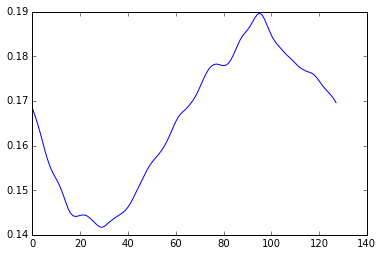

In [9]:
density= compute_fastest_growing_mode("mri_hires_smaller.out1.00034.ath",True)

So this is good, we can see a clear m=1 mode but other modes are also pretty dominate in the nonsmooth feature 

In [13]:
pwd

u'/global/scratch2/sd/dorislee/athena_2/mri_hi_res'

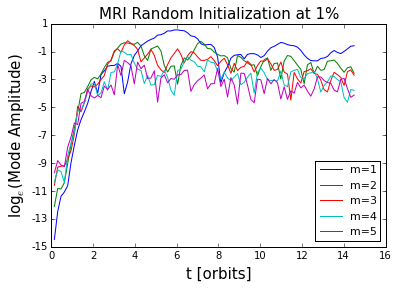

In [23]:
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.ticker as mtick
fig, ax = plt.subplots()
amp =  np.loadtxt("amp.txt")
t_orbits  = np.arange(len(amp))/2./np.pi
plt.ylabel("log$_e$(Mode Amplitude)",fontsize=15)
plt.xlabel("t [orbits]",fontsize=15)
# plt.semilogy(t_orbits,amp[:,1])
plt.semilogy(t_orbits,amp[:,1],label="m=1",basey=np.e)
plt.semilogy(t_orbits,amp[:,2],label="m=2",basey=np.e)
plt.semilogy(t_orbits,amp[:,3],label="m=3",basey=np.e)
plt.semilogy(t_orbits,amp[:,4],label="m=4",basey=np.e)
plt.semilogy(t_orbits,amp[:,5],label="m=5",basey=np.e)
x_min=5
x_max=10
# plt.axvline(x_min,color='r',linestyle="--")
# plt.axvline(x_max,color='r',linestyle="--")
# plt.xlim(0,4)
plt.title("MRI Random Initialization at 1%",fontsize=15)
plt.legend(loc='lower right',prop={'size':11},numpoints=1)
def ticks(y, pos):
    return r'{:.0f}'.format(np.log(y))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticks))
# plt.savefig("randinit1percent.pdf",format="pdf")

### Computing Mode Growth using a smaller-timestep resolution run

1.21915151552 -8.66630591337
Growth Rate is:  0.820242592716


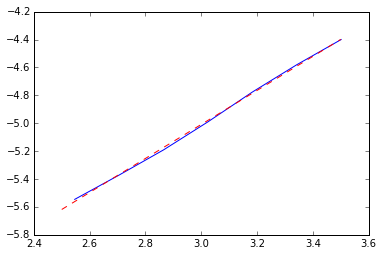

In [210]:
m=1
start=16
end=23
x = t_orbits[start:end]
y=log(amp[start:end,m])
# A = np.vstack([x, np.ones(len(x))]).T
plt.plot(x,y,label="m=1")#,basey=np.e)
m, c = np.linalg.lstsq(A, y)[0]
print m, c
x_fit = np.linspace(2.5,3.5)
y_fit = m*x_fit+c
plt.plot(x_fit,y_fit,'--',color='red')
print "Growth Rate is: ",1./m

In [208]:
compute_mode_growth(1,16,23)
compute_mode_growth(2,16,23)
compute_mode_growth(3,16,23)

For Mode m= 1
Growth rate:  0.821959421918 orbital time
For Mode m= 2
Growth rate:  -0.67298285412 orbital time
For Mode m= 3
Growth rate:  3.75635864618 orbital time


In [175]:
def compute_mode_growth(m,x_min,x_max):
    y_min = amp[x_min,:][m]
    y_max = amp[x_max,:][m]
    print "For Mode m=",m
    e_folding_time = (x_max-x_min)/log(y_max/y_min)
    print "Growth rate: ",e_folding_time/2./pi ,"orbital time"

Computing m=1 mode growth

In [90]:
compute_mode_growth(1,2,10)
compute_mode_growth(2,7,10)
compute_mode_growth(3,9,10.5)
# compute_mode_growth(4,7,10)
# compute_mode_growth(5,7,10)


For Mode m= 1
Growth rate:  0.364176702871 orbital time
For Mode m= 2
Growth rate:  0.813682457409 orbital time
For Mode m= 3
Growth rate:  0.569244225967 orbital time


#### Least square fitting 

1.15208755615 -8.41514168371
Growth Rate is:  0.867989585218


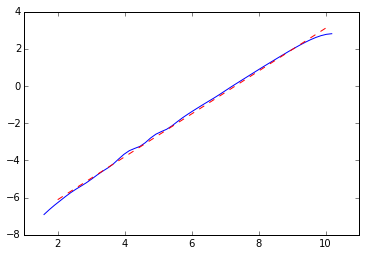

In [109]:
start=10
end=65
x = t_orbits[start:end]
y=log(amp[start:end,1])
A = np.vstack([x, np.ones(len(x))]).T
plt.plot(x,y,label="m=1")#,basey=np.e)
m, c = np.linalg.lstsq(A, y)[0]
print m, c
x_fit = np.linspace(2,10)
y_fit = m*x_fit+c
plt.plot(x_fit,y_fit,'--',color='red')
print "Growth Rate is: ",1./m

2.12713926655 -18.887793733
Growth Rate is:  0.470114964134


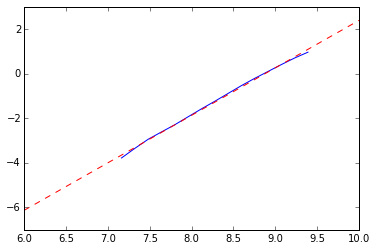

In [224]:
m=2
start=45
end=60
x = t_orbits[start:end]
y=log(amp[start:end,m])
A = np.vstack([x, np.ones(len(x))]).T
plt.plot(x,y,label="m=1")#,basey=np.e)
m, c = np.linalg.lstsq(A, y)[0]
print m, c
x_fit = np.linspace(6,10)
y_fit = m*x_fit+c
plt.plot(x_fit,y_fit,'--',color='red')
print "Growth Rate is: ",1./m

2.66190073803 -26.1109943464
Growth Rate is:  0.375671408671


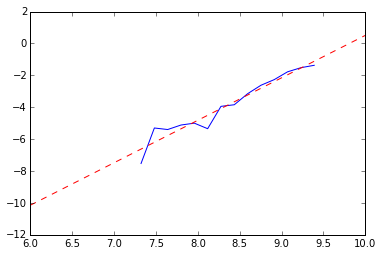

In [232]:
m=3
start=46
end=60
x = t_orbits[start:end]
y=log(amp[start:end,m])
A = np.vstack([x, np.ones(len(x))]).T
plt.plot(x,y,label="m=1")#,basey=np.e)
m, c = np.linalg.lstsq(A, y)[0]
print m, c
x_fit = np.linspace(6,10)
y_fit = m*x_fit+c
plt.plot(x_fit,y_fit,'--',color='red')
print "Growth Rate is: ",1./m

In [197]:
compute_mode_growth(1,1,8)
compute_mode_growth(2,10,15)
compute_mode_growth(3,10,15)

For Mode m= 1
Growth rate:  0.326219065722 orbital time
For Mode m= 2
Growth rate:  0.467568215303 orbital time
For Mode m= 3
Growth rate:  0.344111420548 orbital time
